<h1 style="text-align:center">Machine Learning Assignment 7</h1>
<h3 style="text-align:center">Felix Filipi - 2301877590 </h3>

In [1]:
import pandas as pd
ds=pd.read_csv('datasets/Social_Network_Ads.csv')
ds

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<h3>1. Is there a relationship between Age, Estimated Salary and Purchased?</h3>

In [2]:
ds=ds.iloc[:,-3:]
ds

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
ds.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


<h3> Terlihat bahwa, ada hubungan diantara ketiganya (ketiganya memiliki korelasi diatas 0.1)

<h3>2. Using KNN Classification Algorithm in Python, show you predict Purchased 
(0=No or 1=Yes) using Age and Estimated Salary?</h3>

In [4]:
#define independent
x=ds.iloc[:,:-1]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [5]:
#define dependent
y=ds.iloc[:,-1:]
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


<h3>Cross Validation</h3>

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.75, random_state=42)

<h3>Output Visualization

Text(0, 0.5, 'Estimated Salary')

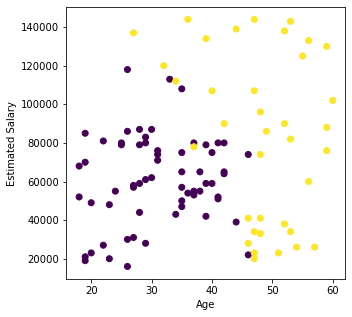

In [7]:
import matplotlib.pyplot as plt
import numpy as np

out=np.array(y_test)
out.reshape(100)

plt.figure(figsize=(5,5))
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], c=out)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

<h3>Standardization</h3>

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_train=scaler.fit_transform(X_train)
scaled_test=scaler.fit_transform(X_test)

<h3>Classification wih KNN </h3>

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k=100
accuracy=np.zeros(k-1)
for i in range (1,k):
    model=KNeighborsClassifier(n_neighbors=i).fit(scaled_train,y_train.values.ravel())
    prediction=model.predict(scaled_test)
    accuracy[i-1]=metrics.accuracy_score(prediction,y_test)
accuracy

array([0.9 , 0.84, 0.92, 0.89, 0.92, 0.93, 0.93, 0.94, 0.94, 0.94, 0.94,
       0.93, 0.93, 0.92, 0.92, 0.92, 0.93, 0.93, 0.93, 0.93, 0.93, 0.92,
       0.92, 0.93, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.93, 0.92,
       0.93, 0.92, 0.92, 0.92, 0.92, 0.93, 0.92, 0.93, 0.94, 0.94, 0.93,
       0.93, 0.93, 0.93, 0.91, 0.91, 0.91, 0.91, 0.88, 0.89, 0.87, 0.89,
       0.88, 0.89, 0.89, 0.89, 0.88, 0.88, 0.88, 0.87, 0.87, 0.87, 0.88,
       0.88, 0.88, 0.88, 0.87, 0.87, 0.87, 0.87, 0.86, 0.87, 0.86, 0.86,
       0.82, 0.83, 0.82, 0.82, 0.81, 0.81, 0.81, 0.81, 0.8 , 0.8 , 0.79,
       0.79, 0.78, 0.79, 0.79, 0.8 , 0.78, 0.8 , 0.78, 0.79, 0.79, 0.8 ])

<h3>Kita dapat lihat bahwa nilai K dengan akurasi tertinggi ada pada K=7 dengan akurasi 83%

In [10]:
print(accuracy.max(), "K=", accuracy.argmax()+1) 

0.94 K= 8


<h3>Kita bandingkan nilai dari hasil prediksi dengan nilai sesungguhnya

In [11]:
model1=KNeighborsClassifier(n_neighbors=8).fit(scaled_train,y_train.values.ravel())
prediction1=model1.predict(scaled_test)

y_test['Prediction_KNN'] = prediction1

frame = pd.merge(ds,y_test['Prediction_KNN'],left_index = True, right_index = True)
pd.options.display.max_rows=None
frame

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Age,EstimatedSalary,Purchased,Prediction_KNN
0,19,19000,0,0
3,27,57000,0,0
5,27,58000,0,0
9,35,65000,0,0
15,29,80000,0,0
18,46,28000,1,1
22,48,41000,1,1
25,47,20000,1,1
30,31,74000,0,0
31,27,137000,1,1


<h3>Visualize Data

Text(0, 0.5, 'Estimated Salary')

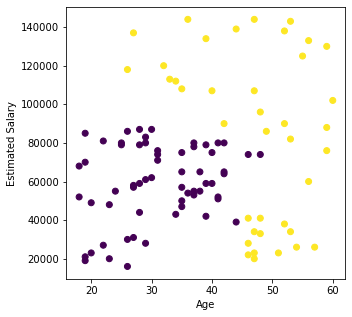

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], c=prediction1)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

<h3>3. Using Logistic Regression Classification in Python, show you predict Purchased 
(0=No or 1=Yes) using Age and Estimated Salary?

In [13]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(scaled_train,y_train)

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

<h3>Accuracy lebih kecil dibanding KNN

In [14]:
model2.score(scaled_test,y_test['Purchased'])

0.86

In [15]:
prediction2=model2.predict(scaled_test)
y_test['Prediction_Logistic_Regression']=prediction2
frame=pd.merge(frame,y_test['Prediction_Logistic_Regression'],left_index=True,right_index=True)
frame

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,EstimatedSalary,Purchased,Prediction_KNN,Prediction_Logistic_Regression
0,19,19000,0,0,0
3,27,57000,0,0,0
5,27,58000,0,0,0
9,35,65000,0,0,0
15,29,80000,0,0,0
18,46,28000,1,1,0
22,48,41000,1,1,0
25,47,20000,1,1,0
30,31,74000,0,0,0
31,27,137000,1,1,0


<h3>Visualize Data

Text(0, 0.5, 'Estimated Salary')

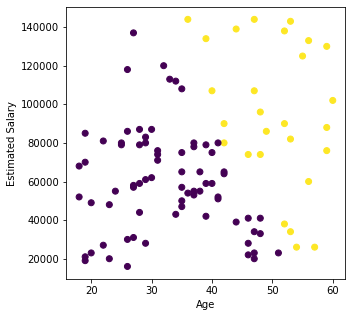

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], c=prediction2)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')